In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Show first few rows
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Data info
df.info()

# Summary stats
df.describe()

# Missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


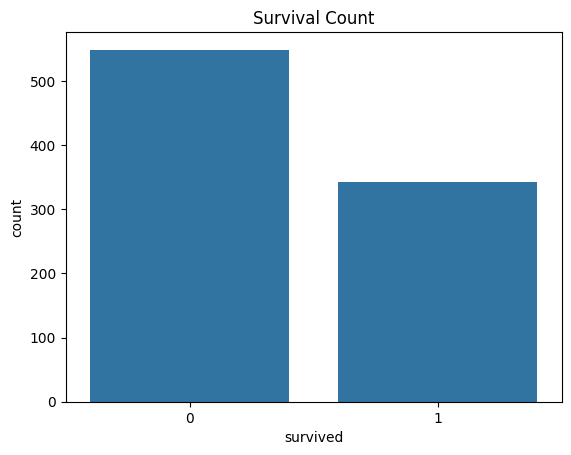

In [ ]:
sns.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.show()


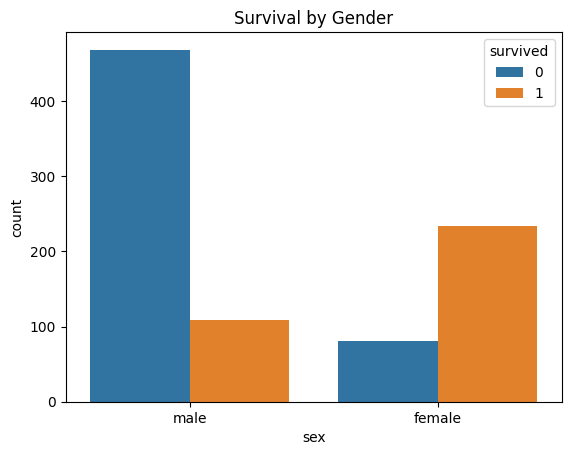

In [ ]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()


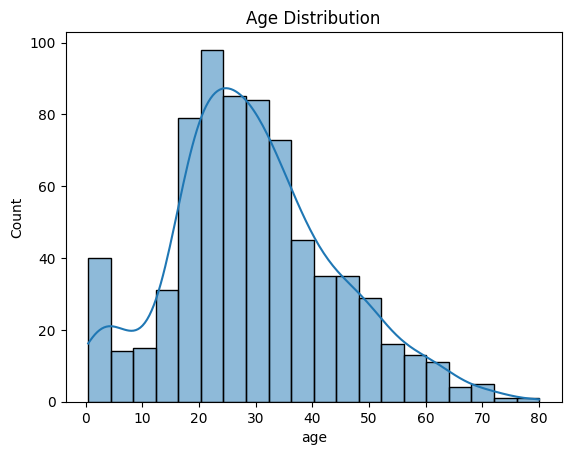

In [ ]:
sns.histplot(df['age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()


In [ ]:
# Drop columns that aren't useful
# Check for existing columns before dropping
existing_columns = df.columns.tolist()
columns_to_drop = ['deck', 'embark_town', 'alive']
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

df = df.drop(columns=columns_to_drop)

# Fill missing values
df['age'] = df['age'].fillna(df['age'].median())

# Drop any remaining nulls
df = df.dropna()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Encode categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])

# Features & target
X = df[['pclass', 'sex', 'age', 'fare', 'embarked']]
y = df['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, preds))


Accuracy: 0.7752808988764045
